# Building simple Nueral Network with python:
This is main workflow and functions you need. but if there is something missing or you need to add more or remove something feel free to try it.  
**JUST dont change _VanilaNN_ class methods**(their argumants only)

## import packages:


In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
np.random.seed(37) #dont change this line

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from progressbar import ProgressBar

## download and prepare dataset

In [ ]:
# download dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Visualize dataset:

x_train shape:  (60000, 28, 28) y_train shape:  (60000,)
x_test shape:  (10000, 28, 28) y_test shape:  (10000,)


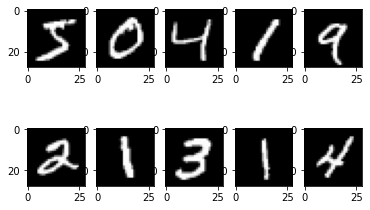

In [ ]:
print('x_train shape: ',x_train.shape,'y_train shape: ', y_train.shape)
print('x_test shape: ',x_test.shape,'y_test shape: ', y_test.shape)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i,:,:], cmap = "gray")

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
Y_train1 = y_train.reshape(-1,1)
enc.fit(Y_train1)
Y_train1 = enc.transform(Y_train1).toarray()
Y_test1 = y_test.reshape(-1,1)
enc.fit(Y_test1)
Y_test1 = enc.transform(Y_test1).toarray()

In [ ]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [ ]:
Xtrain = X_train.T/255.0
Xtest = X_test.T/255.0
print(Xtrain.shape, Xtest.shape)

(784, 60000) (784, 10000)


In [ ]:
Y_train1 = Y_train1.T
Y_test1 = Y_test1.T
print(Y_train1.shape)

(10, 60000)


# define model:


In [ ]:
def linear(x):
  #put your code here
  # :)
  return x

def sigmoid(x):
  #put your code here
  x = 1/(1 + np.exp(-x))
  return x

def softmax(x):
  #put your code here
  x = np.exp(-x)/(np.sum(np.exp(-x), axis=0))
  return x

def relu(x):
  #put your code here
  x = np.maximum(0,x)
  return x

def relu_backward(dA, Z):
  #put your code here
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

def linear_backward(dA, Z):
  #put your code here
  # :)
  return dZ

def sigmoid_backward(dA, Z):
  #put your code here
  sig = 1/(1+np.exp(-Z))
  dZ = dA * sig * (1-sig)
  return dZ


def cross_entropy(yhat, y):
  #put your code here
  i = np.argmax(y, axis = 1).astype(int)# one-hot to 0 1 2 3 ...
  py = yhat[np.arange(len(yhat)),i]
  loss = -1.0 * np.log(py)
  return loss

def BC_logits_backward(z,y):
  #put your code here
  dz = (1/(1 + np.exp(-z)) - y)
  return dz

def CE_logits_backward(z,y):
  #put your code here
  dz = (y - np.exp(-z)/(np.sum(np.exp(-z), axis=0)))
  return dz

def initialize_parameters(info):
  #put your code here
  np.random.seed(7)
  params = {}
  for i in range(1, len(info)):
    params['W' + str(i)] = np.random.randn(info[i], info[i-1])*0.1 #this makes random numbers to vary in smaller range
    params['b' + str(i)] = np.zeros((info[i], 1))
  return params


def compute_cost(yhat, Y, loss_type):
  #put your code here
  N = Y.shape[1]
  if loss_type =='cross_entropy':
    losslog = cross_entropy(yhat, Y)
  elif loss_type == 'binary_cross_entropy':
    losslog = -1.0*(np.multiply(np.log(yhat),Y) + np.multiply(np.log(1 - yhat), 1 - Y))
  elif loss_type == 'mse':
    losslog = np.sum((yhat-Y)**2, axis=0)
  cost = 1.0/N * np.sum(losslog)
  return cost

def forward_propagation(params, X, activation):
  #put your code here
  cache = {}
  keys = []
  n_layer = len(params)//2
  a = X
  for l in range(1,n_layer):
    W = params['W'+str(l)]
    b = params['b'+str(l)]
    z = np.dot(W,a) + b # W dimi*(dim i-1), a dim i-1 * m
    if activation[l]=='sigmoid':
      a = sigmoid(z)
    elif activation[l]=='relu':
      a = relu(z)
    elif activation[l]=='linear':
      a = linear(z)
    elif activation[l]=='softmax':
      a = softmax(z)
    else:
      print('Activation not defined')
      return
    cache[l] = (z,a,W,b)
  Wnth = params['W'+str(n_layer)]
  bnth = params['b'+str(n_layer)]
  z = np.dot(Wnth, a) + bnth # a comes from last layer
  if activation[n_layer]=='sigmoid':
    a = sigmoid(z)
  elif activation[n_layer]=='relu':
    a = relu(z)
  elif activation[n_layer]=='linear':
    a = linear(z)
  elif activation[n_layer]=='softmax':
    a = softmax(z)
  else:
    print('activation function is not defined')
    return
  cache[n_layer] = (z,a,Wnth,bnth)
  return a, cache


def backward_propagation(X, Y, cache, activations, loss_type):
  #put your code here
  grads = {}
  N = X.shape[1]
  keys = []
  for key in cache.keys():
    keys.append(key)
  n_layer = max(keys)
  z,a,W, b = cache[n_layer]
  cache_copy = cache
  if loss_type == 'mse':
    da = 1.0/N *(a-Y)
    if activations[n_layer]=='sigmoid':
      dz = sigmoid_backward(da, a)
    elif activations[n_layer]=='relu':
      dz = relu_backward(da, a)
    elif activations[n_layer]=='linear':
      dz = linear_backward(da, a)
    else:
      print('activation function is not defined')
      return
  elif loss_type == 'cross_entropy':
    dz = 1.0/N * CE_logits_backward(z,Y)
  elif loss_type =='binary_cross_entropy':
    dz = 1.0/N * BC_logits_backward(z,Y)
  else:
    print('loss function is not defined')
    return

  dW = np.dot(dz, cache_copy[n_layer-1][1].T)
  db = np.sum(dz, axis=1, keepdims = True)
  grads['dz' + str(n_layer)] = dz
  grads['dW' + str(n_layer)] = dW
  grads['db' + str(n_layer)] = db
  cache_copy[0] = (None,X)
  for l in range(n_layer-1,0,-1):
    a2 = cache_copy[l][1]
    da2 = np.dot(W.T, dz)
    if activations[l]=='sigmoid':
      dz2 = sigmoid_backward(da2, a2)
    elif activations[l]=='relu':
      dz2 = relu_backward(da2, a2)
    elif activations[l]=='linear':
      dz2 = linear_backward(da2, a2)
    else:
      print('activation function is not defined')
      return
    dW2 = np.dot(dz2, cache_copy[l-1][1].T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    dz = dz2
    W = cache_copy[l][2]
    grads['da' + str(l)] = da2
    grads['dz' + str(l)] = dz2
    grads['dW' + str(l)] = dW2
    grads['db' + str(l)] = db2
  return grads

def make_mini_batches(N,batch_size=16, shuffle=True):
  indices = []
  random_indices = np.arange(N)
  if shuffle:
      np.random.shuffle(random_indices)
  mini_batch = []
  n_minibatches = N // batch_size
  for i in range(n_minibatches):
      indices.append((random_indices[i*batch_size:i*batch_size + batch_size]))
  i = i+1
  if N % batch_size != 0:
      indices.append((random_indices[i*batch_size:N]))
  return indices

def update_parameters_with_gd(params, grads, learning_rate):
  keys = []
  for key in params.keys():
    keys.append(key)
  n_layer = len(keys)//2
  for l in range(1,n_layer):
    params["W" + str(l)] = params["W" + str(l)] - learning_rate * grads["dW" + str(l)]
    params["b" + str(l)] = params["b" + str(l)] - learning_rate * grads["db" + str(l)]
  return params

def initialize_adam(params) :
  #put your code here
  v = {}
  s = {}
  keys = []
  for key in params.keys():
    keys.append(key)
  n_layer = len(keys)//2
  for l in range(n_layer):
    v["dW" + str(l+1)] = np.zeros(params['W' + str(l+1)].shape)
    v["db" + str(l+1)] = np.zeros(params['b' + str(l+1)].shape)
    s["dW" + str(l+1)] = np.zeros(params['W' + str(l+1)].shape)
    s["db" + str(l+1)] = np.zeros(params['b' + str(l+1)].shape)
  return  v, s

def update_parameters_with_adam(params, grads, v, s, t, learning_rate,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
  #put your code here
  v2 = {}
  s2 = {}
  keys = []
  for key in params.keys():
    keys.append(key)
  n_layer = len(keys)//2

  for l in range(n_layer):
    # step 1
    v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dW' + str(l+1)]
    v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]

    # step2: modify
    v2["dW" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
    v2["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))

    # step1, grad square
    s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dW' + str(l+1)], 2)
    s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)

    # step2, modify grad square
    s2["dW" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
    s2["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))

    # step3 update
    params["W" + str(l+1)] = params['W' + str(l+1)] - learning_rate * v2['dW' + str(l+1)] / np.sqrt(s2['dW' + str(l+1)] + epsilon)
    params["b" + str(l+1)] = params['b' + str(l+1)] - learning_rate * v2['db' + str(l+1)] / np.sqrt(s2['db' + str(l+1)] + epsilon)

  return params, v, s

In [ ]:
class VanilaNN(object):
  """
  naive implemetation of Neural Network with desired layers and activations.
  """
  def __init__(self, layers_def={1:{"type":"fc","units":64,"activation":"relu"},
                                 2:{"type":"fc","units":128,"activation":"relu"},
                                 3:{"type":"fc","units":10,"activation":"softmax"}
                                },loss="cross_entropy", optimizer='adam', optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8}):
    """
    n-layers neural network.

    Arguments:
      layers_def: python dictionay, key: layer index, value: all parameters you need to construct a layer
      loss: string ('mse', 'cross_entropy', 'binary_cross_entropy')
      optimizer: string, ('sgd','adam')
      optimizer_parameters: python dictionary (all parameters that optimizer needs)

    """

    #put your code here
    self.activations = []
    self.dims = []
    for i in range(len(layers_def)):
      if i ==0:
        self.activations.append(' ')
      else:
        if layers_def[i]["activation"] in ['sigmoid', 'relu', 'linear', 'softmax']:
          self.activations.append(layers_def[i]["activation"])
          if i==len(layers_def)-1:
            if layers_def[i]["activation"] not in ['sigmoid', 'linear', 'softmax']:
              print('activation function is not supported for the last layer')
              return
          else:
            if layers_def[i]["activation"] not in ['relu', 'linear']:
              print('activation function is not supported for the hidden layers')
              return
        else:
          print('activation function is not supported')
          return
      self.dims.append(layers_def[i]['units'])
    if len(self.dims) != len(self.activations):
      print('number of activations and dimensions are not equal')
      return
    if loss not in ['binary_cross_entropy','cross_entropy','mse']:
      assert loss in ['binary_cross_entropy','cross_entropy','mse']
    if optimizer not in ['adam', 'sgd']:
      assert optimizer in ['adam', 'sgd']

    self.optimizer_parameters = optimizer_parameters
    self.optimizer_parameters['t'] = 0

    self.optimizer = optimizer
    self.parameters = initialize_parameters(self.dims)
    self.loss = loss
    if optimizer == 'adam':
       v, s = initialize_adam(self.parameters)
       self.optimizer_parameters['v'] = v
       self.optimizer_parameters['s'] = s


  def train(self,X, Y,X_val, Y_val, learning_rate = 0.001, batch_size = 64, num_epochs = 10,print_cost = True):
    """
    Arguments:
      X : training data, of shape (features, N)
      Y : training true labels (num_classes, N)
      X_val : validation data, of shape (features, N)
      Y_val : validation true labels (num_classes, N)
      learning_rate:  the learning rate, scalar.
      batch_size: the size of a mini batch
      num_epochs: number of epochs
      print_cost: True to print the cost every epoch
    Returns:
      a python dictionary containing history of train-val accuracy and loss
    """
    costs = []
    train_loss_hist = []
    val_loss_hist = []
    train_acc_hist = []
    val_acc_hist = []
    best_acc = 0
    # Optimization loop
    for i in range(num_epochs):
      k = 0
      print('\nepoch: ',i)
      # get random minibatches indices.
      minibatches = make_mini_batches(X.shape[1],batch_size=batch_size, shuffle=True)
      with ProgressBar(max_value=len(minibatches)) as bar:
        for minibatch in minibatches:
          # Select a minibatch
          minibatch_X = X[:,minibatch]
          minibatch_Y =  Y[:,minibatch]
          # Forward propagation
          a, caches = forward_propagation(self.parameters,minibatch_X,self.activations)

          # Compute cost
          cost = compute_cost(a, minibatch_Y, self.loss)


          # Backward propagation
          grads = backward_propagation(minibatch_X, minibatch_Y, caches,self.activations, self.loss)


          # Update parameters
          if self.optimizer == "sgd":
            self.parameters = update_parameters_with_gd(self.parameters,grads, learning_rate)
          elif self.optimizer == "adam":
            self.optimizer_parameters['t'] = self.optimizer_parameters['t'] + 1
            self.parameters,self.optimizer_parameters['v'],self.optimizer_parameters['s'] = update_parameters_with_adam(self.parameters,

                                                                                                                        grads, self.optimizer_parameters['v'],
                                                                                                                        self.optimizer_parameters['s'],
                                                                                                                        self.optimizer_parameters['t'],learning_rate,
                                                                                                                        self.optimizer_parameters['beta1'],
                                                                                                                        self.optimizer_parameters['beta2'],
                                                                                                                        self.optimizer_parameters['epsilon']
                                                                                                                        )
          else:
            raise NotImplementedError('Undefined optimizer')
        k = k +1
        bar.update(k)
      costs.append(cost)
      acc, loss = self.evaluate(X_val, Y_val,batch_size = 128)
      val_acc_hist.append(acc)
      val_loss_hist.append(loss)
      if acc>best_acc:
        best_acc = acc
      if print_cost == True:
        print('cost', cost)
        print('Val_acc', acc,'Val_loss', loss)

      acc, loss = self.evaluate(X, Y,batch_size = 128)
      train_acc_hist.append(acc)
      train_loss_hist.append(loss)
      if print_cost == True:
        print('train_acc', acc,'train_loss', loss)
      if i%10==0 and i!=0 and True:
        # plot loss
        plt.plot(train_loss_hist,'',val_loss_hist,'-')
        plt.title('loss')
        plt.legend(['train','validation'])
        plt.grid()
        plt.show()
        # plot accuracy
        plt.plot(train_acc_hist,'',val_acc_hist,'-')
        plt.title('Accuracy')
        plt.legend(['train','val'])
        plt.grid()
        plt.show()
    history =  {'loss_train': train_loss_hist,
                'loss_val': val_loss_hist,
                'accuracy_train': train_acc_hist,
                'accuracy_val': val_acc_hist}
    print('best_acc',best_acc)
    return history
    # Optimization loop
  def evaluate(self, x_test, y_test,batch_size):
    """
    Arguments:
      x_test: input data, of shape (features, N)
      y_test : true label (num_classes, N)
    returns:
      acc, cost

    """
    minibatches = make_mini_batches(x_test.shape[1],batch_size=batch_size, shuffle=False)
    TP_TN = 0
    predictions = []
    costs = 0

    for minibatch in minibatches:
      # Select a minibatch
      minibatch_X = x_test[:,minibatch]
      minibatch_Y =  y_test[:,minibatch]
      al, caches = forward_propagation(self.parameters, minibatch_X, self.activations)
      costs = costs + compute_cost(al, minibatch_Y, self.loss)
      preds = np.argmax(al,axis=0)
      labels = np.argmax(minibatch_Y,axis=0)
      TP_TN  = TP_TN +  (preds == labels).sum()
      predictions.append(preds)
    acc = TP_TN/x_test.shape[1]
    costs = costs / len(minibatches)
    return acc, costs

  def predict(self, x_test, batch_size=512):
    """
    Arguments:
      x_test: input data, of shape (features, N)
    returns:
      predicted values

    """
    minibatches = make_mini_batches(x_test.shape[1],batch_size=batch_size, shuffle=False)
    predictions = []
    for minibatch in minibatches:
      minibatch_X = x_test[:,minibatch]
      al, caches = forward_propagation(self.parameters, minibatch_X, self.activations)
      pred = np.argmax(al,axis=0)
      predictions.append(pred)
    predictions = np.concatenate(predictions, 0)
    return predictions


## Training:


epoch:  0


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.24473002295754692
Val_acc 0.8839 Val_loss 0.21973793588131427
train_acc 0.87795 train_loss 0.225984056099891

epoch:  1


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.13775089119750863
Val_acc 0.922 Val_loss 0.13980151385691572
train_acc 0.9190833333333334 train_loss 0.14276316501588313

epoch:  2


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.10881134921470001
Val_acc 0.9322 Val_loss 0.11390951707251332
train_acc 0.9352833333333334 train_loss 0.11312324724674233

epoch:  3


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.08775593509597295
Val_acc 0.9449 Val_loss 0.09473049187686457
train_acc 0.94775 train_loss 0.09222014016788685

epoch:  4


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.07079115962832519
Val_acc 0.9521 Val_loss 0.08241089956578743
train_acc 0.9549833333333333 train_loss 0.07895404311107088

epoch:  5


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.05486494646319399
Val_acc 0.9562 Val_loss 0.07418098942588201
train_acc 0.962 train_loss 0.06878263409548215

epoch:  6


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.07540366324924234
Val_acc 0.9609 Val_loss 0.06720361729405783
train_acc 0.96625 train_loss 0.06118931679811914

epoch:  7


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.05103269157996205
Val_acc 0.9646 Val_loss 0.061823243426355125
train_acc 0.9698833333333333 train_loss 0.05527399556067213

epoch:  8


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.06467697332460094
Val_acc 0.968 Val_loss 0.057330783720404385
train_acc 0.97315 train_loss 0.04962305929677332

epoch:  9


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.06074838886668155
Val_acc 0.9692 Val_loss 0.05485042943210712
train_acc 0.9759833333333333 train_loss 0.045526468507883264

epoch:  10


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.048638822945584824
Val_acc 0.9715 Val_loss 0.05130845371488837
train_acc 0.9784833333333334 train_loss 0.041495507424215886


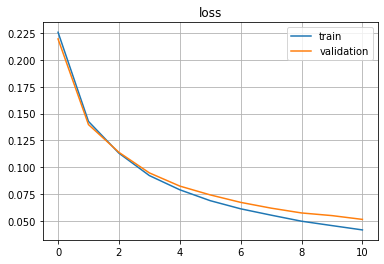

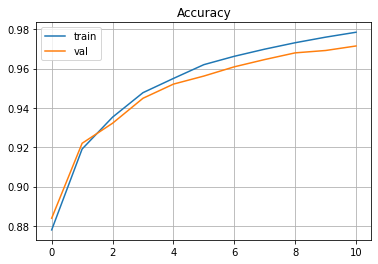


epoch:  11


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.04585871129746433
Val_acc 0.9722 Val_loss 0.050499966342095796
train_acc 0.9795166666666667 train_loss 0.03919724146259538

epoch:  12


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.03695430185732448
Val_acc 0.9732 Val_loss 0.047389721786383496
train_acc 0.9819833333333333 train_loss 0.03499997663348252

epoch:  13


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.03889184529765395
Val_acc 0.9742 Val_loss 0.04596969106382148
train_acc 0.9838 train_loss 0.03267613124143352

epoch:  14


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.02521457762300171
Val_acc 0.9758 Val_loss 0.04377401590829059
train_acc 0.9854666666666667 train_loss 0.029596650516541357

epoch:  15


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.025405563277015708
Val_acc 0.9742 Val_loss 0.044478155587976465
train_acc 0.9857 train_loss 0.028907270243399882

epoch:  16


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.028106247421783984
Val_acc 0.9759 Val_loss 0.04201623872282638
train_acc 0.9874666666666667 train_loss 0.025616799355311897

epoch:  17


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.0236666613252702
Val_acc 0.9779 Val_loss 0.0404250246059541
train_acc 0.98885 train_loss 0.023289178708977603

epoch:  18


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.025211258963687415
Val_acc 0.9775 Val_loss 0.04036792325118108
train_acc 0.9896166666666667 train_loss 0.022267767071024142

epoch:  19


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.021003497853361742
Val_acc 0.9779 Val_loss 0.04027937966298985
train_acc 0.9902333333333333 train_loss 0.021145199192038007

epoch:  20


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.014803832216348756
Val_acc 0.9786 Val_loss 0.03818792846577587
train_acc 0.9919666666666667 train_loss 0.018420089112897723


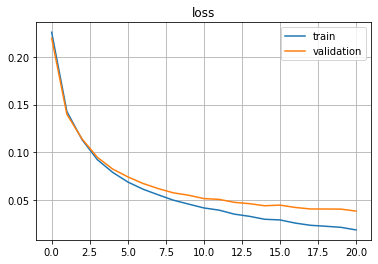

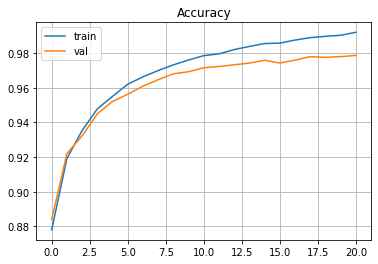


epoch:  21


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.017157735105993947
Val_acc 0.9782 Val_loss 0.038173562018854135
train_acc 0.992 train_loss 0.017286059631263957

epoch:  22


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.01432869906302221
Val_acc 0.978 Val_loss 0.038925053914858516
train_acc 0.9924833333333334 train_loss 0.017470201817626582

epoch:  23


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.02461872431943696
Val_acc 0.9786 Val_loss 0.037773929612070274
train_acc 0.99335 train_loss 0.015367658709392183

epoch:  24


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.01206796698062561
Val_acc 0.9796 Val_loss 0.03659500251466808
train_acc 0.9944333333333333 train_loss 0.013212172423378875

epoch:  25


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.010284341306265257
Val_acc 0.9796 Val_loss 0.03649409045750421
train_acc 0.9952833333333333 train_loss 0.012393905540674896

epoch:  26


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.015944968802517563
Val_acc 0.9798 Val_loss 0.03625519124107919
train_acc 0.9957333333333334 train_loss 0.011597195601653303

epoch:  27


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.010349867372366652
Val_acc 0.9799 Val_loss 0.03614615148380792
train_acc 0.9961 train_loss 0.010714450928016761

epoch:  28


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.012099888423008031
Val_acc 0.9799 Val_loss 0.03615228529326611
train_acc 0.9964166666666666 train_loss 0.009871408786335838

epoch:  29


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.008938688969380014
Val_acc 0.98 Val_loss 0.035559932687132596
train_acc 0.9967333333333334 train_loss 0.009188262596909448

epoch:  30


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.006597159222728524
Val_acc 0.9805 Val_loss 0.035342769155619076
train_acc 0.9973333333333333 train_loss 0.008045323352728725


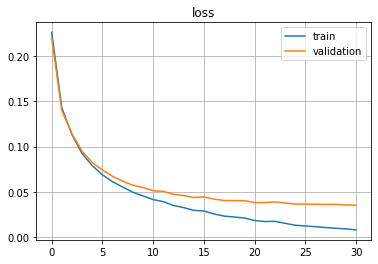

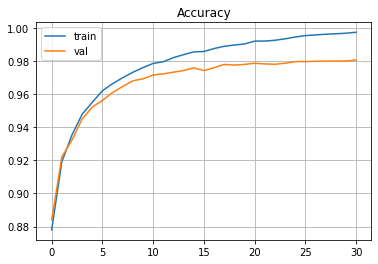


epoch:  31


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


cost 0.010551626338911832
Val_acc 0.9806 Val_loss 0.035596853679981215
train_acc 0.9975166666666667 train_loss 0.007506338026385754
best_acc 0.9806


In [ ]:
model = VanilaNN(layers_def={0:{"type":"fc","units":Xtrain.shape[0],"activation":"nothing"},
                             1:{"type":"fc","units":128,"activation":"relu"},
                             2:{"type":"fc","units":256,"activation":"relu"},
                             3:{"type":"fc","units":10,"activation":"sigmoid"}
                             },loss="mse", optimizer='adam',
                 optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8})

history = model.train(Xtrain, Y_train1,Xtest, Y_test1, learning_rate = 0.001, batch_size = 1024,
                      num_epochs = 32,print_cost = True)


# plot training history:

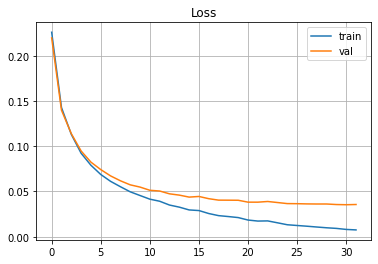

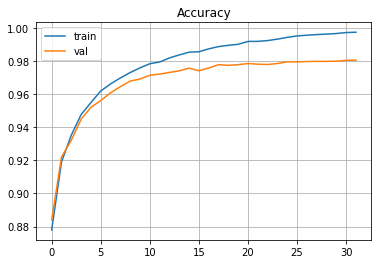

In [ ]:
# plot loss
plt.plot(history['loss_train'],'', history['loss_val'],'-')
plt.title('Loss')
plt.legend(['train','val'])
plt.grid()
plt.show()
# plot accuracy
plt.plot(history['accuracy_train'],'', history['accuracy_val'],'-')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.grid()
plt.show()

# Evaluate model:

In [ ]:
# make a prediction:
n = 10
prediction = model.predict(Xtest[:,n:n+1], 1)
print('prediction: ', prediction[0], " true label: ",Y_test1[:,n], 'real number', np.argmax(Y_test1[:,n]))


prediction:  0  true label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] real number 0


In [ ]:
test_acc, test_loss = model.evaluate(Xtest, Y_test1,128)
print("Accuracy = %2.2f, Loss = %2.4f"%(test_acc, test_loss))

Accuracy = 0.98, Loss = 0.0356


# Increasing number of layers

In [ ]:
layers_def1 ={0:{"type":"fc","units":Xtrain.shape[0],"activation":"nothing"},
              1:{"type":"fc","units":64,"activation":"relu"},
              2:{"type":"fc","units":128,"activation":"relu"},
              3:{"type":"fc","units":10,"activation":"sigmoid"}
              }
layers_def2 ={0:{"type":"fc","units":Xtrain.shape[0],"activation":"nothing"},
              1:{"type":"fc","units":32,"activation":"relu"},
              2:{"type":"fc","units":64,"activation":"relu"},
              3:{"type":"fc","units":128,"activation":"relu"},
              4:{"type":"fc","units":10,"activation":"sigmoid"}
              }
layers_def3 ={0:{"type":"fc","units":Xtrain.shape[0],"activation":"nothing"},
              1:{"type":"fc","units":32,"activation":"relu"},
              2:{"type":"fc","units":64,"activation":"relu"},
              3:{"type":"fc","units":128,"activation":"relu"},
              4:{"type":"fc","units":256,"activation":"relu"},
              5:{"type":"fc","units":10,"activation":"sigmoid"}
              }
layers_def4 ={0:{"type":"fc","units":Xtrain.shape[0],"activation":"nothing"},
              1:{"type":"fc","units":32,"activation":"relu"},
              2:{"type":"fc","units":64,"activation":"relu"},
              3:{"type":"fc","units":128,"activation":"relu"},
              4:{"type":"fc","units":256,"activation":"relu"},
              5:{"type":"fc","units":512,"activation":"relu"},
              6:{"type":"fc","units":10,"activation":"sigmoid"}
              }


epoch:  0


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  1


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  2


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  3


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  4


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  5


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  6


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  7


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  8


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  9


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  10


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


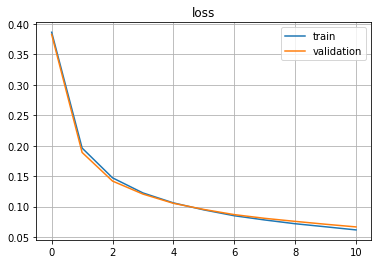

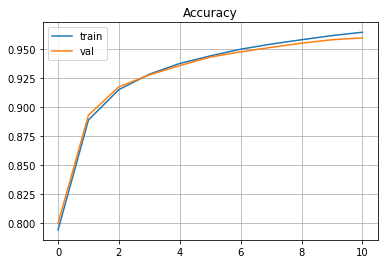


epoch:  11


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  12


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  13


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  14


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  15


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  16


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  17


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  18


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  19


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  20


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


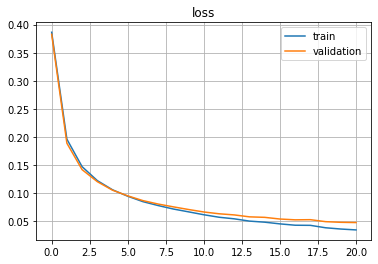

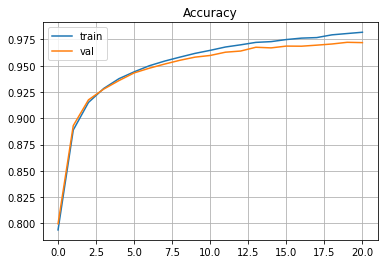


epoch:  21


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  22


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  23


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  24


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  25


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  26


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  27


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  28


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  29


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  30


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


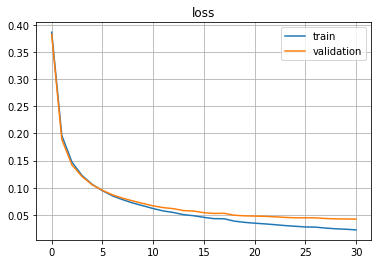

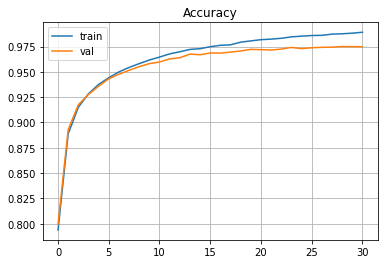


epoch:  31


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


best_acc 0.9757

epoch:  0


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  1


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  2


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  3


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  4


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  5


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  6


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  7


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  8


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  9


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  10


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


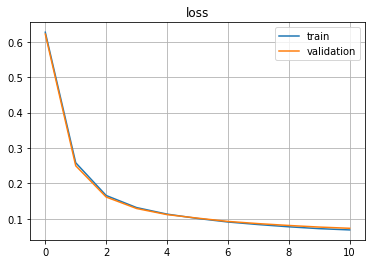

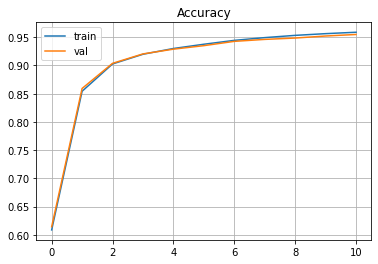


epoch:  11


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  12


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  13


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  14


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  15


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  16


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  17


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  18


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  19


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  20


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


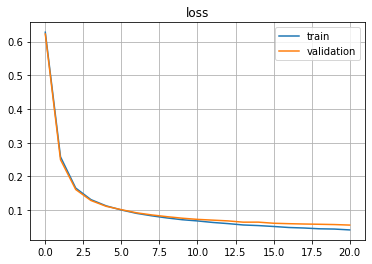

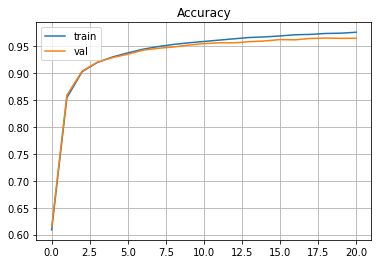


epoch:  21


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  22


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  23


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  24


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  25


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  26


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  27


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  28


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  29


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  30


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


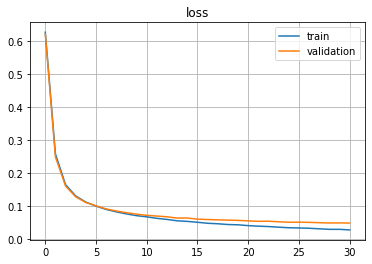

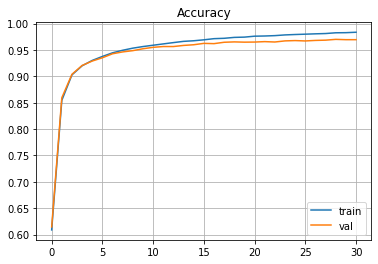


epoch:  31


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


best_acc 0.97

epoch:  0


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  1


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  2


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  3


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  4


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  5


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  6


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  7


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  8


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  9


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  10


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


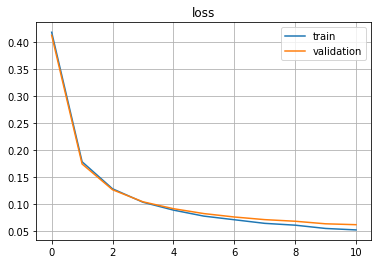

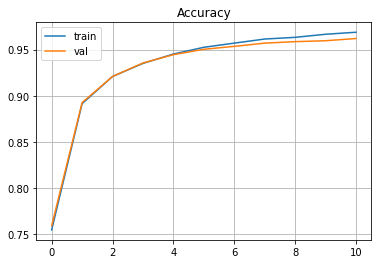


epoch:  11


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  12


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  13


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  14


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  15


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  16


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  17


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  18


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  19


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  20


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


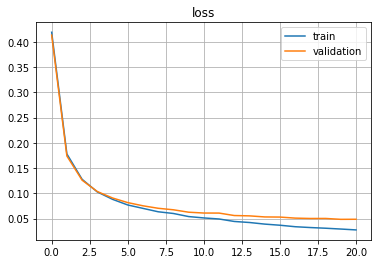

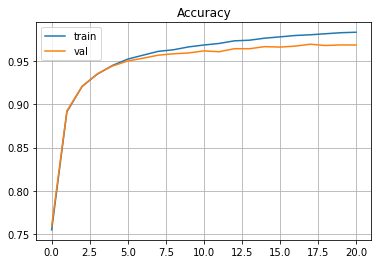


epoch:  21


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  22


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  23


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  24


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  25


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  26


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  27


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  28


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  29


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  30


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


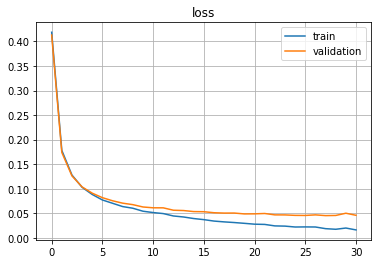

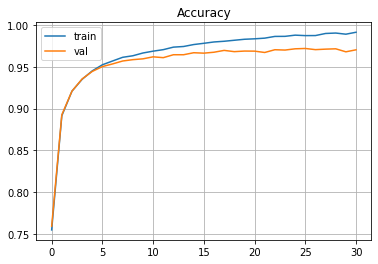


epoch:  31


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


best_acc 0.972

epoch:  0


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  1


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  2


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  3


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  4


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  5


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  6


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  7


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  8


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  9


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  10


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


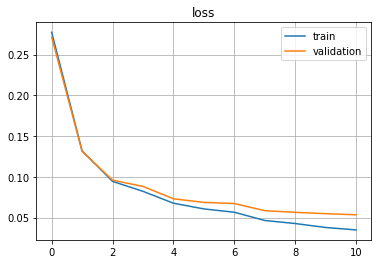

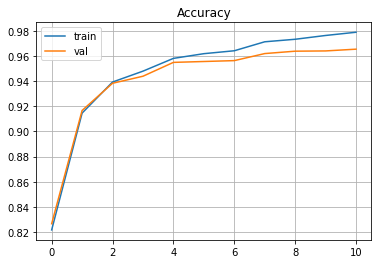


epoch:  11


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  12


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  13


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  14


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  15


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  16


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  17


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  18


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  19


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  20


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


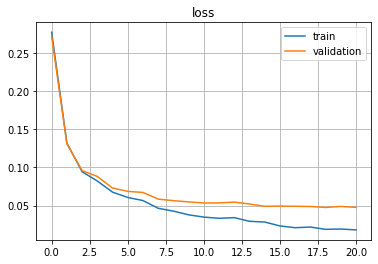

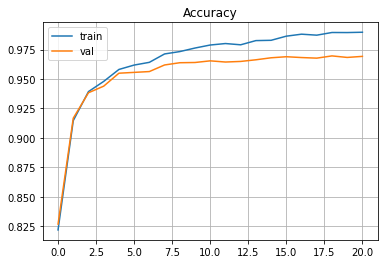


epoch:  21


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  22


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  23


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  24


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  25


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  26


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  27


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  28


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  29


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch:  30


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


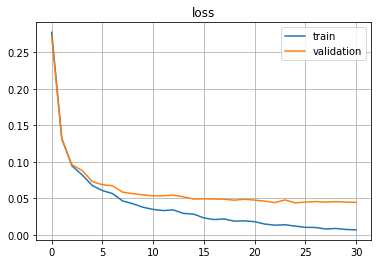

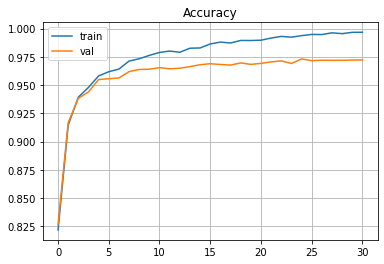


epoch:  31


100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


best_acc 0.9731


In [ ]:
layer_defs = [layers_def1,layers_def2,layers_def3,layers_def4]
history_list = []
for layers_def in layer_defs:
  model = VanilaNN(layers_def=layers_def,loss="mse", optimizer='adam',
                  optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8})

  history = model.train(Xtrain, Y_train1,Xtest, Y_test1, learning_rate = 0.001, batch_size = 1024,
                        num_epochs = 32,print_cost = False)
  history_list.append(history)


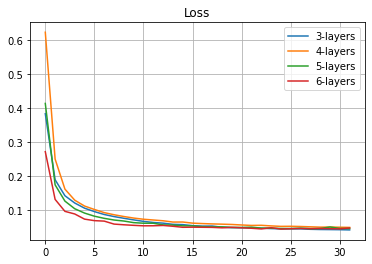

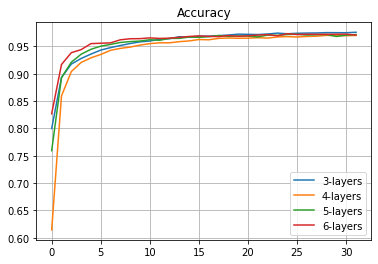

In [ ]:
# plot loss
plt.plot(history_list[0]['loss_val'],'', history_list[1]['loss_val'],'-', history_list[2]['loss_val'],'-', history_list[3]['loss_val'],'-')
plt.title('Loss')
plt.legend(['3-layers','4-layers','5-layers','6-layers'])
plt.grid()
plt.show()
# plot accuracy
plt.plot(history_list[0]['accuracy_val'],'', history_list[1]['accuracy_val'],'-', history_list[2]['accuracy_val'],'-', history_list[3]['accuracy_val'],'-')
plt.title('Accuracy')
plt.legend(['3-layers','4-layers','5-layers','6-layers'])
plt.grid()
plt.show()